In [1]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
model = load_model('effB0_224.h5')

In [3]:
def bbox_by_black(img):
    
    block=2
    center_distance_ratio=1/4
    
    top=0
    bot=0
    left=0
    right=0

    for y in range(int(img[:,:,0].shape[0]/2+img[:,:,0].shape[0]*center_distance_ratio),img[:,:,0].shape[0]-1):
        if img[y,:,0].mean()<block:
            top=y
            break
    if top==0:
        top=img[:,:,0].shape[0]


    for y in range(int(img[:,:,0].shape[0]/2-img[:,:,0].shape[0]*center_distance_ratio),0,-1):
        if img[y,:,0].mean()<block:
            bot=y
            break


    for x in range(int(img[bot:top,:,0].shape[1]/2+img[bot:top,:,0].shape[1]*center_distance_ratio),img[bot:top,:,0].shape[1]-1):
        if img[bot:top,x,0].mean()<block:
            right=x
            break

    if right==0:
        right=img[bot:top,:,0].shape[1]


    for x in range(int(img[bot:top,:,0].shape[1]/2-img[bot:top,:,0].shape[1]*center_distance_ratio),0,-1):
        if img[bot:top,x,0].mean()<block:
            left=x
            break
    
    return left,right,bot,top

In [4]:
def preprocess(file_path, img_size=224):
    img_bgr = cv2.imread(file_path)
    thresh = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    x1, x2, y1, y2 = bbox_by_black(thresh)
    crop_img = img_bgr[y1:y2, x1:x2].astype('float32')
    img = tf.image.resize_with_pad(crop_img, img_size, img_size)
    return img

In [5]:
classes = open('./classes.txt', 'r').read().split('\n')

In [6]:
data = sorted(glob.glob('test_data' + os.sep + '*'))

In [7]:
img = preprocess(data[15], 224)

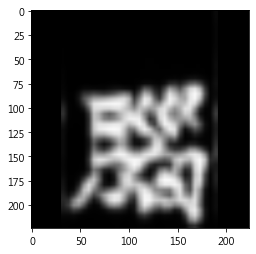

In [8]:
plt.imshow(img.numpy()/255)

In [9]:
preds = []
labels = []
for file in data:
    img = preprocess(file, 224)
    inputs = np.expand_dims(img, axis=0)
    pred = model.predict(inputs)
    pred_class = classes[pred.argmax(-1)[0]]
    pred_conf = pred[0][pred.argmax(-1)[0]]
    if pred_conf <= 0.95:
        pred_class = 'is_null'
    preds.append(pred_class)
    gt = file.split('.')[0][-1]
    if gt not in classes:
        gt = 'is_null'
    labels.append(gt)

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
accuracy_score(labels, preds)

0.918918918918919

In [12]:
labels

['is_null',
 '于',
 'is_null',
 '拓',
 '樂',
 '竹',
 '部',
 '療',
 'is_null',
 '企',
 '斌',
 '館',
 '葳',
 '樺',
 '局',
 '腦',
 '腦',
 '郭',
 '簡',
 '義',
 '恆',
 '伯',
 '惠',
 '施',
 '姿',
 '戶',
 '宣',
 '顏',
 '勇',
 '倫',
 '好',
 '印',
 'is_null',
 'is_null',
 '裝',
 '碩',
 'is_null']

In [13]:
preds

['is_null',
 '于',
 '馬',
 '拓',
 '樂',
 '竹',
 '部',
 '療',
 'is_null',
 '企',
 '斌',
 '館',
 '葳',
 '樺',
 '局',
 '腦',
 '腦',
 '郭',
 '簡',
 '義',
 '恆',
 '伯',
 '惠',
 '施',
 '姿',
 '戶',
 '宣',
 '顏',
 '勇',
 '倫',
 'is_null',
 '印',
 '瑩',
 'is_null',
 '裝',
 '碩',
 'is_null']